En este experimento correremos kNN+PCA en el rango de alphas que queramos para ver y graficar la accuracy y performance de cada uno de ellos.
En nuestro caso corrimos este experimento con un el rango de alphas 1 a 50 y k fijo en 3.
Primero corremos un script para el build de las librerias de c++ como modulos de python.


In [114]:
!sh build.sh

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/martin/miniconda3/bin/python (found version "3.8.5") 
-- Found PythonLibs: /home/martin/miniconda3/lib/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/martin/uba/metodos-numericos/metnum-tp2
-- Configuring done
-- Gen

Importamos librerias necesarias

In [1]:
import metnum
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import time
from pathlib import Path
from utils import get_MNIST
import matplotlib.pyplot as plt

Obtenemos el dataset de mnist, partido en 4/5 de entrenamiento y 1/5 de validacion. El mismo esta shuffleado sobre si mismo.

In [2]:
X_train, y_train, X_val, y_val = get_MNIST(0.8)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 56000 instancias de entrenamiento y 14000 de validación


Seteamos la cantidad de alphas a testear (siempre comenzando de 1) con k=3 ya que este maximiza la accuracy (visto en best_k_knn y mencionado en el informe)

In [3]:
alphas_a_testear = 50
k = 3

Ejecutamos el loop con k para cada alpha, guardamos los resultados en accuracy_con_pca y performance

In [4]:
accuracy_con_pca = []
performance = []
for alpha in range(1, alphas_a_testear):
    start =  time.process_time()

    pca = metnum.PCA(alpha)
    pca.fit(X_train)
    X_train_PCA = pca.transform(X_train)

    X_val_PCA = pca.transform(X_val)

    clf_metnum = metnum.KNNClassifier(k)
    clf_metnum.fit(X_train_PCA, y_train)
    acc = accuracy_score(clf_metnum.predict(X_val_PCA), y_val)
    end = time.process_time()

    time_performance = end - start
    accuracy_con_pca.append(acc)
    performance.append(time_performance)

In [5]:
for i in range(alphas_a_testear - 1):
    print("Alpha: {}. Accuracy: {}. Duration: {}".format(i, accuracy_con_pca[i], performance[i]))

Alpha: 0. Accuracy: 0.26471428571428574. Duration: 50.562504446999995
Alpha: 1. Accuracy: 0.40264285714285714. Duration: 53.21468504100001
Alpha: 2. Accuracy: 0.46564285714285714. Duration: 55.653375036
Alpha: 3. Accuracy: 0.6077857142857143. Duration: 54.90503090599998
Alpha: 4. Accuracy: 0.7327142857142858. Duration: 60.98215320299997
Alpha: 5. Accuracy: 0.8212857142857143. Duration: 62.891604969000014
Alpha: 6. Accuracy: 0.8686428571428572. Duration: 68.669721025
Alpha: 7. Accuracy: 0.8992142857142857. Duration: 66.62017645899999
Alpha: 8. Accuracy: 0.9145. Duration: 68.76288049100003
Alpha: 9. Accuracy: 0.9292857142857143. Duration: 69.455384633
Alpha: 10. Accuracy: 0.9367142857142857. Duration: 73.884583722
Alpha: 11. Accuracy: 0.9464285714285714. Duration: 70.58173299999999
Alpha: 12. Accuracy: 0.9523571428571429. Duration: 76.92363592000004
Alpha: 13. Accuracy: 0.958. Duration: 75.87326759300004
Alpha: 14. Accuracy: 0.9609285714285715. Duration: 80.20121365800003
Alpha: 15. Accu

In [6]:
performance

[50.562504446999995,
 53.21468504100001,
 55.653375036,
 54.90503090599998,
 60.98215320299997,
 62.891604969000014,
 68.669721025,
 66.62017645899999,
 68.76288049100003,
 69.455384633,
 73.884583722,
 70.58173299999999,
 76.92363592000004,
 75.87326759300004,
 80.20121365800003,
 79.277027353,
 83.81662861000018,
 84.72690374299987,
 88.01101967900013,
 86.36126338300005,
 90.98134682699992,
 90.43860122399997,
 94.65889156200001,
 94.58232107200001,
 97.05835347399989,
 103.72653025500017,
 107.22598233600002,
 106.77523425599975,
 106.98411790299997,
 101.90324678599973,
 105.4853224540002,
 103.51876038299997,
 110.53706638099993,
 112.81773145900024,
 118.24996968799996,
 119.35944545400025,
 126.42818804800027,
 122.56559883699992,
 129.59316956300017,
 125.99274927900024,
 133.6417184109996,
 129.5976480899999,
 134.8057556079998,
 131.5564267069999,
 137.99341298200034,
 138.41061836100016,
 142.54173827399973,
 139.51330783100002,
 148.01863495199996]

Generamos un grafico mostrando el ratio accuracy/performance por cada alpha

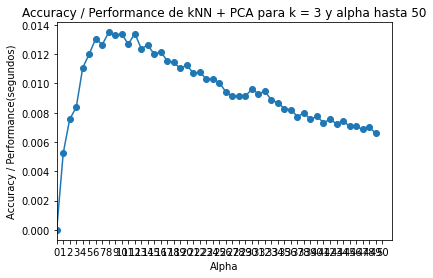

In [7]:
fn = np.insert(np.array(accuracy_con_pca) / np.array(performance), 0, 0)
plt.plot(fn, '-o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy / Performance(segundos)')
plt.xticks(range(alphas_a_testear+1))
plt.xlim(0)
plt.title(f'Accuracy / Performance de kNN + PCA para k = {k} y alpha hasta {alphas_a_testear}')
plt.show()

Generamos un grafico. Arriba, tenemos accuracy por cada alpha y abajo su performance.

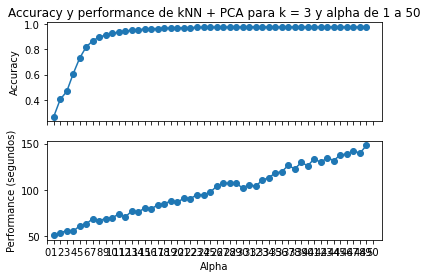

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(range(1, alphas_a_testear), accuracy_con_pca, '-o')
ax2.plot(range(1, alphas_a_testear), performance, '-o')
ax1.set_title(f'Accuracy y performance de kNN + PCA para k = {k} y alpha de 1 a {alphas_a_testear}')
ax2.set_xlabel('Alpha')
ax2.set_xticks(range(alphas_a_testear+1))
ax2.set_xlim(0)
ax2.set_ylabel('Performance (segundos)')
ax1.set_ylabel('Accuracy')
plt.show()

In [9]:
start = time.process_time()
clf_noPCA = metnum.KNNClassifier(3)
clf_noPCA.fit(X_train,y_train)
res = clf_noPCA.predict(X_val)

end = time.process_time()

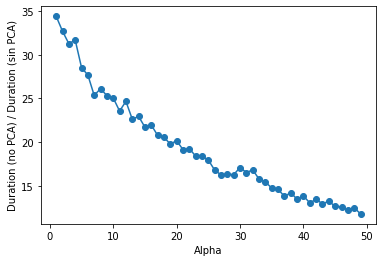

In [13]:
performance = pd.Series(performance)
noPCA_performance = end-start
plt.figure()
plt.xlabel("Alpha")
plt.ylabel("Duration (no PCA) / Duration (sin PCA)")
plt.plot(range(1,50,1),noPCA_performance / performance, '-o')
plt.show()
